## Exploring Datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cc=pd.read_csv("creditcard.csv")

In [4]:
cc.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Preprocessing

In [7]:
x=cc.drop("Class",axis=1)
y=cc["Class"]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [9]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x_scaled,y)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2)

## Testing Different ML Models for Better Accuracy

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

acc_lr=accuracy_score(y_test,y_pred)
print("Accuracy score of Logistic Regression :",acc_lr*100," % ")

Accuracy score of Logistic Regression : 94.82264389849287  % 


In [14]:
from sklearn.tree import DecisionTreeClassifier

tr=DecisionTreeClassifier()
tr.fit(x_train,y_train)

y_pred=tr.predict(x_test)

acc_tr=accuracy_score(y_test,y_pred)
print("Accuracy score of Logistic Regression :",acc_tr*100," % ")

from sklearn import tree
# tree.plot_tree(tr,max_depth=7)
# plt.show()

Accuracy score of Logistic Regression : 99.80831120412219  % 


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn=DecisionTreeClassifier()
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

acc_knn=accuracy_score(y_test,y_pred)
print("Accuracy score of Logistic Regression :",acc_knn*100," % ")


Accuracy score of Logistic Regression : 99.79336299526933  % 


In [16]:
from sklearn.ensemble import RandomForestClassifier

fr=DecisionTreeClassifier()
fr.fit(x_train,y_train)

y_pred=fr.predict(x_test)

acc_fr=accuracy_score(y_test,y_pred)
print("Accuracy score of Logistic Regression :",acc_fr*100," % ")

Accuracy score of Logistic Regression : 99.79600091447865  % 


In [17]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest','KNN'],
    'Accuracy': [acc_lr,acc_tr,acc_fr,acc_knn]
}
df = pd.DataFrame(data)

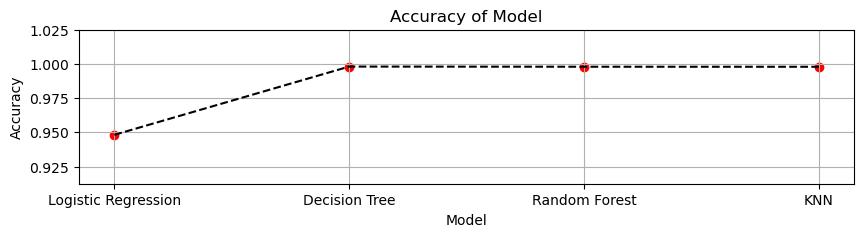

,Model,Accuracy
0,Logistic Regression,0.948226
1,Decision Tree,0.998083
2,Random Forest,0.997960
3,KNN,0.997934


In [18]:
plt.figure(figsize=(10,2))
plt.ylim(0.9125,1.025)
plt.scatter(df['Model'], df['Accuracy'], color='red',marker="o")
plt.plot(df['Model'], df['Accuracy'],ls="--",color='black',scaley=10)
plt.grid(True)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Model')
plt.show()
df

#### For this Datasets Decision Tree Model work better

Accuracy score of Logistic Regression : 99.79512160807556  % 


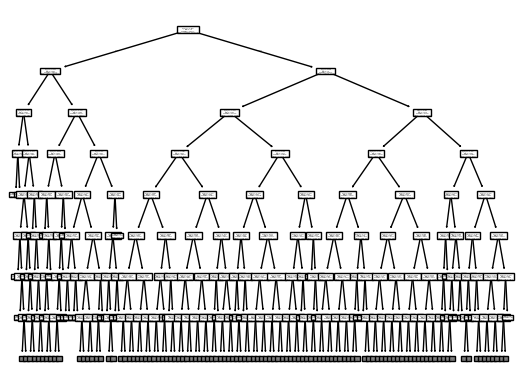

In [20]:
from sklearn.tree import DecisionTreeClassifier

tr=DecisionTreeClassifier()
tr.fit(x_train,y_train)

y_pred=tr.predict(x_test)

acc_tr=accuracy_score(y_test,y_pred)
print("Accuracy score of Logistic Regression :",acc_tr*100," % ")

from sklearn import tree
tree.plot_tree(tr,max_depth=7)
plt.show()

Text(0, 0.5, 'Actual')

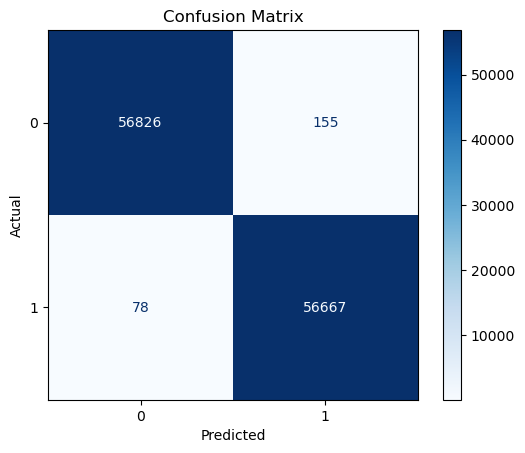

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56981
           1       1.00      1.00      1.00     56745

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

